# Lead Scoring Case Study

### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

### Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Libraries

In [1]:
# Basic libraries 
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

## Reading and Understanding Data

In [2]:
#Reading the data 
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
# Shape of the dataset
df.shape

(9240, 37)

In [4]:
# Statistics for numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observations**
* Based on non non value counts ,multiple columns have null values which we will deal later. 
* `Prospect ID` and `Lead Number` are unique identifiers. so keeping `Lead Number`and dropping `Prospect ID`.
* Few categorical columns have "Select" in their entries and as mentioned in problem statement those are similar to null values hence we will deal with it later.

## Data Cleaning & Handling Null values

In [6]:
# drop prospect ID
df.drop('Prospect ID', axis = 1, inplace = True)

In [7]:
# Replace "Select" category with null values
df = df.replace('Select', np.nan)

In [8]:
# Percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

**Observations**:
<br> Given, there are multiple columns with high number of missing data. We can drop all those columns that have missing values > 35% as those columns are not important from business perspective.

In [9]:
# Drop columns that have null values > 35% 
df.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
                      'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score','City','Tags','Specialization'], 
        axis = 1, inplace = True)

df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [10]:
df.shape

(9240, 26)

In [11]:
# Rechecking Percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

**Observations**:
<br>There are five columns that still have high null values but less than 35% : `Country`, `What is your current occupation`and `What matters most to you in choosing a course`. We will look at them one by one and handle it.

In [12]:
# 'Country' Column
df.Country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

**Observations**:
<br> The column data is heavily skewed with only 2 values "india" and null values consisting of 97% of the data which is very high and thus we can drop this column.

In [13]:
df.drop('Country', axis = 1, inplace = True)

In [14]:
# 'What is your current occupation' column
df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: What is your current occupation, dtype: float64

**Observations**:
<br> Here,we can see that around 60% of the users are unemployed , 30% are NAN and around 8% are working professionals so we can make 3 categories ( Unemployed,working professionals and others) and then distribute NAN values proportionally.

In [15]:
# making 'other' subhead 
df.loc[(df['What is your current occupation'] == 'Student') | (df['What is your current occupation'] == 'Other') | (df['What is your current occupation'] == 'Housewife') | 
       (df['What is your current occupation'] == 'Businessman') , 'What is your current occupation'] = 'Student and Others'

In [16]:
df['What is your current occupation'].value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: What is your current occupation, dtype: float64

In [17]:
# impute proportionately
df['What is your current occupation'] = df['What is your current occupation'].fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

In [18]:
# 'What matters most to you in choosing a course' column
df['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: What matters most to you in choosing a course, dtype: float64

**Observations**:
<br>The column data is heavily skewed with only 2 values "Better Career Prospects" and null values consisting of 99.97% of the data which is very high and thus we can drop this column.

In [19]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [20]:
# Rechecking Percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Update me on Supply Chain Content          0.00
Get updates on DM Content               

**Observations**:
<br>4 columns have null value namely "Lead Source","TotalVisits","Page Views Per Visit" and 'Last Activity' so we will deal with it one by one.

In [21]:
# 'Lead Source' column
# As null value percentage is less and it is categorical column so using value count to see which has highest value.
df['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: Lead Source, dtype: float64

In [22]:
# Imputing with mode as it is categorical column
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)

In [23]:
# 'TotalVisits' column
df['TotalVisits'].value_counts(normalize = True, dropna = False) * 100

0.00     23.69
2.00     18.18
3.00     14.13
4.00     12.12
5.00      8.47
6.00      5.04
1.00      4.27
7.00      3.34
8.00      2.42
9.00      1.77
NaN       1.48
10.00     1.23
11.00     0.93
13.00     0.52
12.00     0.49
14.00     0.39
16.00     0.23
15.00     0.19
17.00     0.17
18.00     0.16
20.00     0.13
19.00     0.10
21.00     0.06
23.00     0.06
24.00     0.05
25.00     0.05
27.00     0.05
22.00     0.03
29.00     0.02
28.00     0.02
26.00     0.02
141.00    0.01
55.00     0.01
30.00     0.01
43.00     0.01
74.00     0.01
41.00     0.01
54.00     0.01
115.00    0.01
251.00    0.01
32.00     0.01
42.00     0.01
Name: TotalVisits, dtype: float64

In [24]:
# imputing with median as null values are very less in number and it is nummerical coulmn
df.TotalVisits.fillna(df.TotalVisits.median(), inplace=True)

In [25]:
# 'Page Views Per Visit' column
df['Page Views Per Visit'].value_counts(normalize = True, dropna = False) * 100

0.00    23.69
2.00    19.43
3.00    12.94
4.00     9.70
1.00     7.05
5.00     5.60
1.50     3.31
6.00     2.64
2.50     2.61
NaN      1.48
7.00     1.44
3.50     1.02
8.00     0.93
1.33     0.71
1.67     0.65
2.33     0.64
2.67     0.58
9.00     0.49
4.50     0.47
1.75     0.30
3.33     0.29
10.00    0.27
1.25     0.25
5.50     0.23
2.25     0.21
11.00    0.19
3.67     0.17
6.50     0.14
1.80     0.14
2.75     0.13
1.40     0.12
4.33     0.10
14.00    0.10
2.80     0.10
2.20     0.10
1.60     0.09
2.17     0.09
3.25     0.09
2.40     0.06
13.00    0.06
1.20     0.05
12.00    0.05
1.43     0.04
3.40     0.04
2.60     0.04
1.71     0.04
1.83     0.04
15.00    0.04
1.38     0.03
4.25     0.03
4.75     0.03
1.57     0.03
16.00    0.03
5.67     0.03
1.78     0.03
1.56     0.02
5.40     0.02
2.71     0.02
2.83     0.02
1.23     0.02
1.22     0.02
3.60     0.02
3.75     0.02
7.50     0.02
1.14     0.02
2.22     0.02
5.25     0.02
5.33     0.02
2.09     0.02
3.20     0.02
4.17     0.01
2.57  

In [26]:
# imputing with median as null values are very less in number and it is nummerical coulmn
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

In [27]:
# 'Last Activity' column
df['Last Activity'].value_counts(normalize = True, dropna = False) * 100

Email Opened                   37.20
SMS Sent                       29.71
Olark Chat Conversation        10.53
Page Visited on Website         6.93
Converted to Lead               4.63
Email Bounced                   3.53
Email Link Clicked              2.89
Form Submitted on Website       1.26
NaN                             1.11
Unreachable                     1.01
Unsubscribed                    0.66
Had a Phone Conversation        0.32
Approached upfront              0.10
View in browser link Clicked    0.06
Email Received                  0.02
Email Marked Spam               0.02
Visited Booth in Tradeshow      0.01
Resubscribed to emails          0.01
Name: Last Activity, dtype: float64

In [28]:
# Imputing with mode as it is categorical column
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)

In [29]:
# Rechecking Percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Update me on Supply Chain Content          0.00
Get updates on DM Content               

Note: All Null value columns have been handled now.

### Handling unique values categorical column 

In [30]:
for a, b in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Lead Origin = 5
Lead Source = 21
Do Not Email = 2
Do Not Call = 2
Last Activity = 17
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


**Observations**:
<br>Out of 19 Categorical column, 15 columns have unique values <=3 and 4 columns have unique values more than 3  so we will deal with these first.

In [31]:
# "Lead Origin" column
df["Lead Origin"].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: Lead Origin, dtype: float64

In [32]:
# Combining to reduce unique values as few of them are very small in proportion, 
df.loc[(df["Lead Origin"] == 'Lead Import') | (df["Lead Origin"] == 'Quick Add Form') | (df["Lead Origin"] == 'Lead Add Form')
       , "Lead Origin"] = 'Lead Add Form and Others'

In [33]:
#recheck
df["Lead Origin"].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.88
API                        38.74
Lead Add Form and Others    8.38
Name: Lead Origin, dtype: float64

In [34]:
# "Lead Source" column
df["Lead Source"].value_counts(normalize = True, dropna = False) * 100

Google              31.43
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: Lead Source, dtype: float64

In [35]:
# Keeping top 5 and from 6th combining rest as from 6th percenatge is very very less.
df['Lead Source'] = df['Lead Source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

In [36]:
#recheck
df["Lead Source"].value_counts(normalize = True, dropna = False) * 100

Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Other Social Sites    3.79
Name: Lead Source, dtype: float64

In [37]:
# "Last Activity" column
df["Last Activity"].value_counts(normalize = True, dropna = False) * 100

Email Opened                   38.31
SMS Sent                       29.71
Olark Chat Conversation        10.53
Page Visited on Website         6.93
Converted to Lead               4.63
Email Bounced                   3.53
Email Link Clicked              2.89
Form Submitted on Website       1.26
Unreachable                     1.01
Unsubscribed                    0.66
Had a Phone Conversation        0.32
Approached upfront              0.10
View in browser link Clicked    0.06
Email Received                  0.02
Email Marked Spam               0.02
Visited Booth in Tradeshow      0.01
Resubscribed to emails          0.01
Name: Last Activity, dtype: float64

In [38]:
# Keeping top 7 and from 8th combining rest as from 8th percenatge is very very less.
df['Last Activity'] = df['Last Activity'].apply(lambda x: x if 
                                            ((x== 'Email Opened') | (x=='SMS Sent') | (x=='Olark Chat Conversation') | 
                                             (x=='Page Visited on Website') | (x=='Email Bounced')| (x=='Email Link Clicked') | (x=='Converted to Lead')) 
                                            else 'Other activties')

In [39]:
#recheck
df["Last Activity"].value_counts(normalize = True, dropna = False) * 100

Email Opened              38.31
SMS Sent                  29.71
Olark Chat Conversation   10.53
Page Visited on Website    6.93
Converted to Lead          4.63
Email Bounced              3.53
Other activties            3.47
Email Link Clicked         2.89
Name: Last Activity, dtype: float64

In [40]:
# "Last Notable Activity" column
df["Last Notable Activity"].value_counts(normalize = True, dropna = False) * 100

Modified                       36.87
Email Opened                   30.60
SMS Sent                       23.51
Page Visited on Website         3.44
Olark Chat Conversation         1.98
Email Link Clicked              1.87
Email Bounced                   0.65
Unsubscribed                    0.51
Unreachable                     0.35
Had a Phone Conversation        0.15
Email Marked Spam               0.02
Approached upfront              0.01
Resubscribed to emails          0.01
View in browser link Clicked    0.01
Form Submitted on Website       0.01
Email Received                  0.01
Name: Last Notable Activity, dtype: float64

In [41]:
# Keeping top 6 and from 7th combining rest as from 7th percenatge is very very less.
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x: x if 
                                            ((x== 'Modified') | (x=='Email Opened') | (x=='SMS Sent') | 
                                             (x=='Page Visited on Website') | (x=='Olark Chat Conversation')| (x=='Email Link Clicked')) 
                                            else 'Other notable activties')

In [42]:
#recheck
df["Last Notable Activity"].value_counts(normalize = True, dropna = False) * 100

Modified                  36.87
Email Opened              30.60
SMS Sent                  23.51
Page Visited on Website    3.44
Olark Chat Conversation    1.98
Email Link Clicked         1.87
Other notable activties    1.73
Name: Last Notable Activity, dtype: float64

### Handling Binary columns and data imbalance

**Note**:
* Dropping those columns that have significant data imbalance
* Dropping all those columns that have only 1 unique entry

In [43]:
#recheck unique values
for a, b in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Lead Origin = 3
Lead Source = 6
Do Not Email = 2
Do Not Call = 2
Last Activity = 8
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 7


**Observation**
* The following columns can be dropped as they have just 1 unique values
    * `Magazine`
    * `Receive More Updates About Our Courses`
    * `Update me on Supply Chain Content`
    * `Get updates on DM Content`
    * `I agree to pay the amount through cheque`

In [44]:
binary_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
           'I agree to pay the amount through cheque']

df.drop(binary_drop, axis = 1, inplace = True)

Now we will check for Data Imbalance

In [45]:
# selecting rest of the binary columns in a new dataframe
df_data = df[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']]

# see value counts for each of the columns
for i in df_data.columns:
    x = (df_data[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: Do Not Email, dtype: float64

No    99.98
Yes    0.02
Name: Do Not Call, dtype: float64

No    99.85
Yes    0.15
Name: Search, dtype: float64

No    99.98
Yes    0.02
Name: Newspaper Article, dtype: float64

No    99.99
Yes    0.01
Name: X Education Forums, dtype: float64

No    99.99
Yes    0.01
Name: Newspaper, dtype: float64

No    99.96
Yes    0.04
Name: Digital Advertisement, dtype: float64

No    99.92
Yes    0.08
Name: Through Recommendations, dtype: float64

No    68.74
Yes   31.26
Name: A free copy of Mastering The Interview, dtype: float64



**Observations**
<br> Because of heavy data imbalance, we can drop below mentioned columns
* `Do Not Call`
* `Search`
* `Newspaper Article`
* `X Education Forums`
* `Newspaper`
* `Digital Advertisement`
* `Through Recommendations`

In [46]:
imbalance_drop = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper','Digital Advertisement','Through Recommendations']

df.drop(imbalance_drop, axis = 1, inplace = True)

In [47]:
df.shape

(9240, 12)

## Exploratory Data Analysis

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

### Numericals columns 

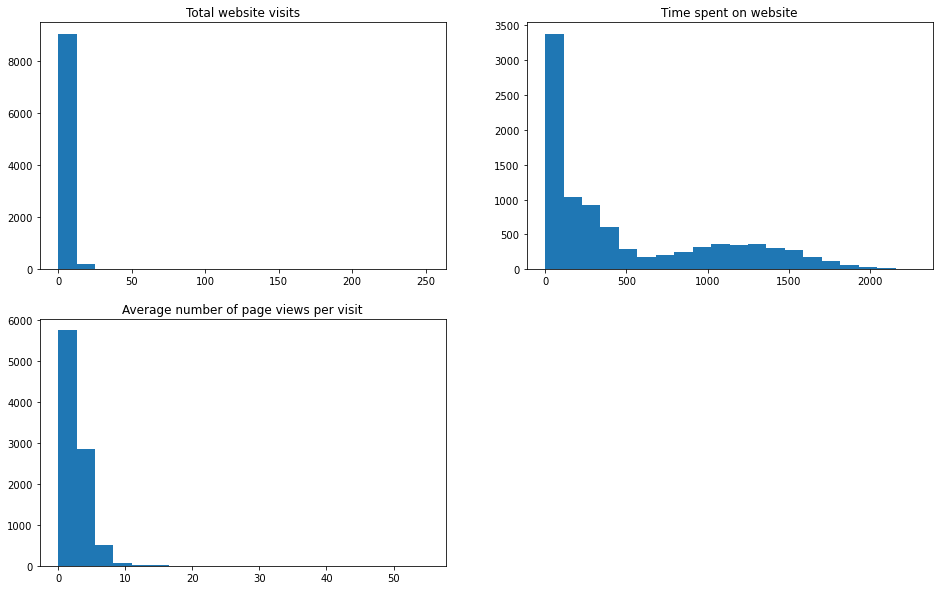

In [49]:
# 'Lead number' is identifier column and 'converted' is target column so first checking with rest of 3 numerical columns.

fig = plt.figure(figsize = (16, 10))

plt.subplot(2, 2, 1)
plt.hist(df.TotalVisits,bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df["Total Time Spent on Website"],bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df["Page Views Per Visit"],bins = 20)
plt.title('Average number of page views per visit')

plt.show()

**Observations**:
<br> High peaks which is an indication of outliers so we will check for that.

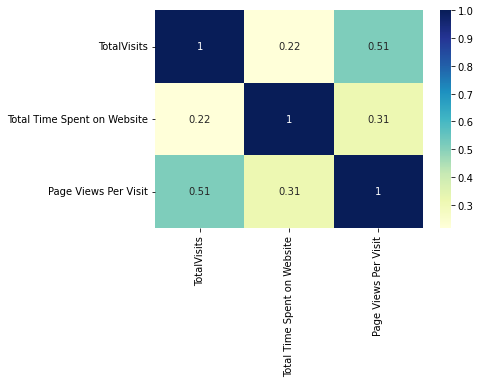

In [50]:
# Heatmap for correlation
sns.heatmap(df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations**:
<br> Nothing as such from correlation so moving with boxplot.

### Outlier and its treatment

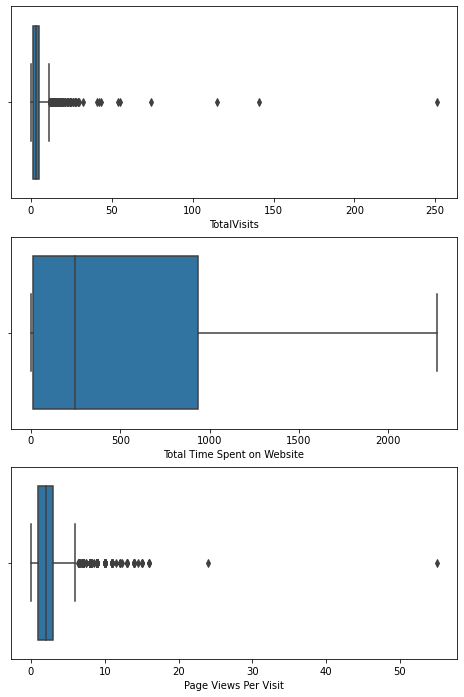

In [51]:
plt.figure(figsize = (8, 12))

plt.subplot(3,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [52]:
outlier_check = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
outlier_check.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
99%,17.00,1840.61,9.00
max,251.00,2272.00,55.00


**Observations**

* Looking at both the box plots and the statistics, there are upper bound outliers in both `TotalVisits` and `Page Views Per Visit` columns. Hence, the data can be capped at 99 percentile.

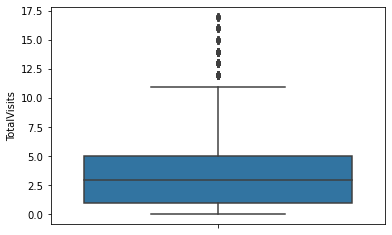

In [53]:
#Outlier Treatment: capping at 99% percentile for "TotalVisits"

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

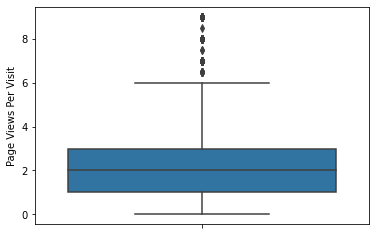

In [54]:
#Outlier Treatment: capping at 99% percentile for "Page Views Per Visit"

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit']<= Q3)]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

### Categorical columns

In [55]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Student and Others,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Other activties,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Unemployed,No,Modified


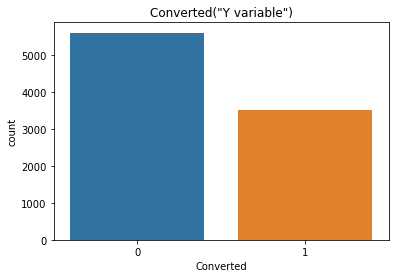

In [56]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

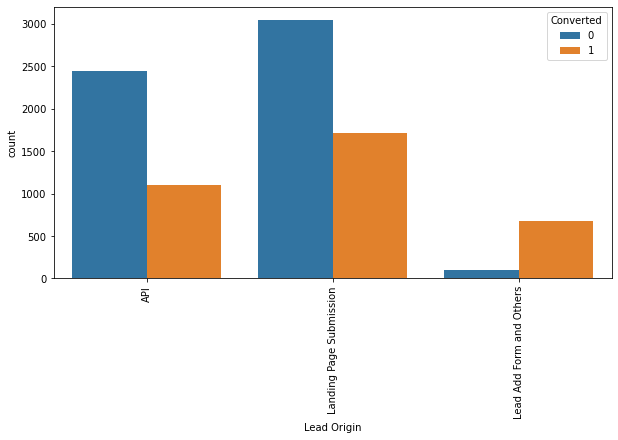

In [57]:
# 'Lead Origin' Column
plt.figure(figsize=(10,5))
a1=sns.countplot(df['Lead Origin'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

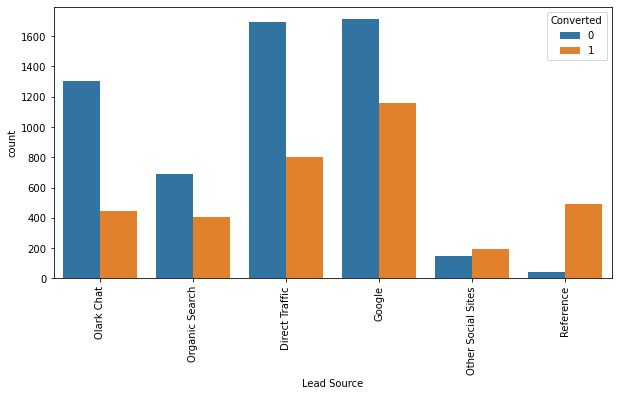

In [58]:
# 'Lead Source' Column
plt.figure(figsize=(10,5))
a1=sns.countplot(df['Lead Source'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

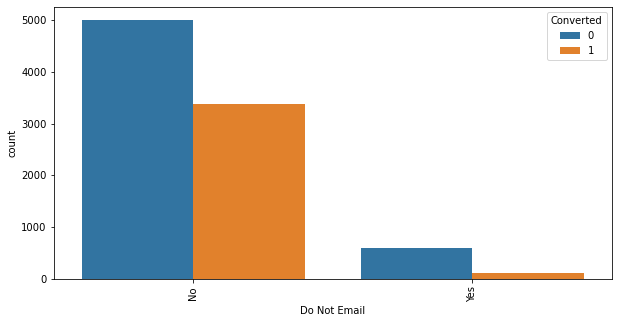

In [59]:
# 'Do Not Email' Column
plt.figure(figsize=(10,5))
a1=sns.countplot(df['Do Not Email'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

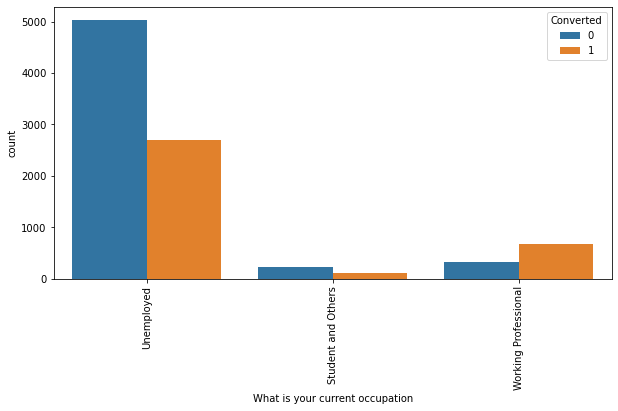

In [60]:
# 'What is your current occupation' Column
plt.figure(figsize=(10,5))
a1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

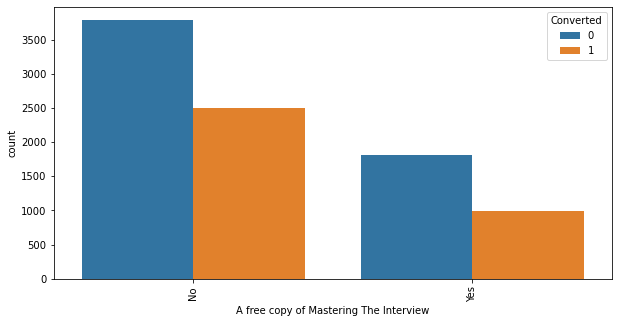

In [61]:
# 'A free copy of Mastering The Interview' Column
plt.figure(figsize=(10,5))
a1=sns.countplot(df['A free copy of Mastering The Interview'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

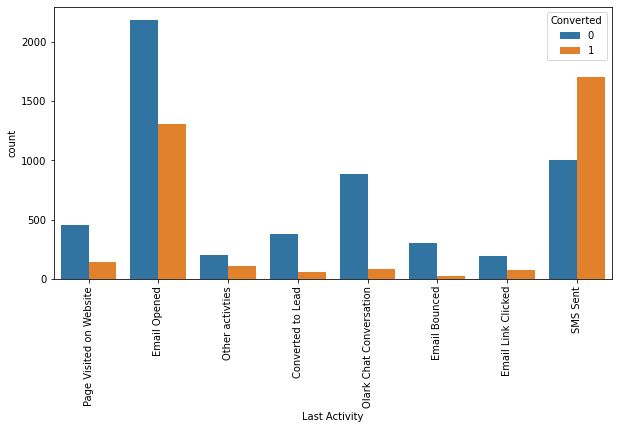

In [62]:
# 'Last Activity' Column
plt.figure(figsize=(10,5))
a1=sns.countplot(df['Last Activity'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

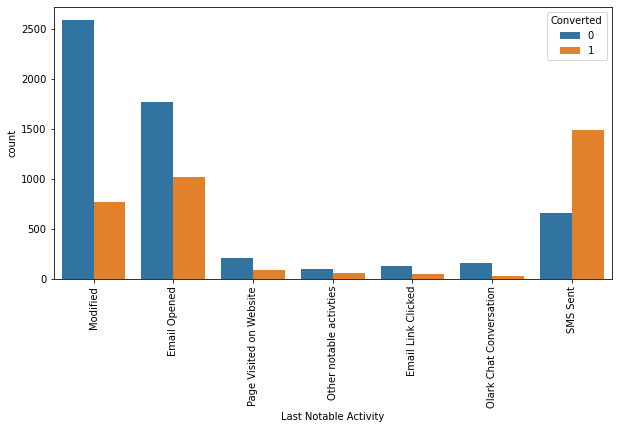

In [63]:
# 'Last Notable Activity' Column
plt.figure(figsize=(10,5))
a1=sns.countplot(df['Last Notable Activity'], hue=df.Converted)
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
plt.show()

## Data Preparation

### Converting Binary (Yes/No) to 0/1

In [64]:
# determine unique values
for a, b in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Lead Origin = 3
Lead Source = 6
Do Not Email = 2
Last Activity = 8
What is your current occupation = 3
A free copy of Mastering The Interview = 2
Last Notable Activity = 7


**Observations**

* Only 2 columns with binary value `Do Not Email` and `A free copy of Mastering The Interview` columns.Thus we will convert these two to 0/1.

In [65]:
binlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the  list
df[binlist] = df[binlist].apply(binary_map)

# check the operation was success
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Student and Others,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Other activties,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Unemployed,0,Modified


### Creating dummy variable for categorical columns

In [66]:
# Creating a dummy variable for rest of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [67]:
# Dropping the columns for which dummies have been created
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], axis = 1, inplace = True)

df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other activties,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other notable activties,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.00,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,660728,0,0,5.00,674,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,0,1,2.00,1532,2.00,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,1.00,305,1.00,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,660681,0,1,2.00,1428,1.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [68]:
df.shape

(9090, 29)

## Test-Train Split

In [69]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df.drop(['Lead Number', 'Converted'], axis=1)

X.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other activties,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other notable activties,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.00,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [70]:
# Putting response variable to y
y = df['Converted']

y.head(2)

0    0
1    0
Name: Converted, dtype: int64

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler
# Scaling the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head(3)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form and Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Social Sites,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other activties,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other notable activties,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,0,0.41,0.11,0.26,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
6087,1,0.00,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1033,0,0.29,0.21,0.56,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [73]:
# checking the conversion rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.448844884488445

### Looking at correlations

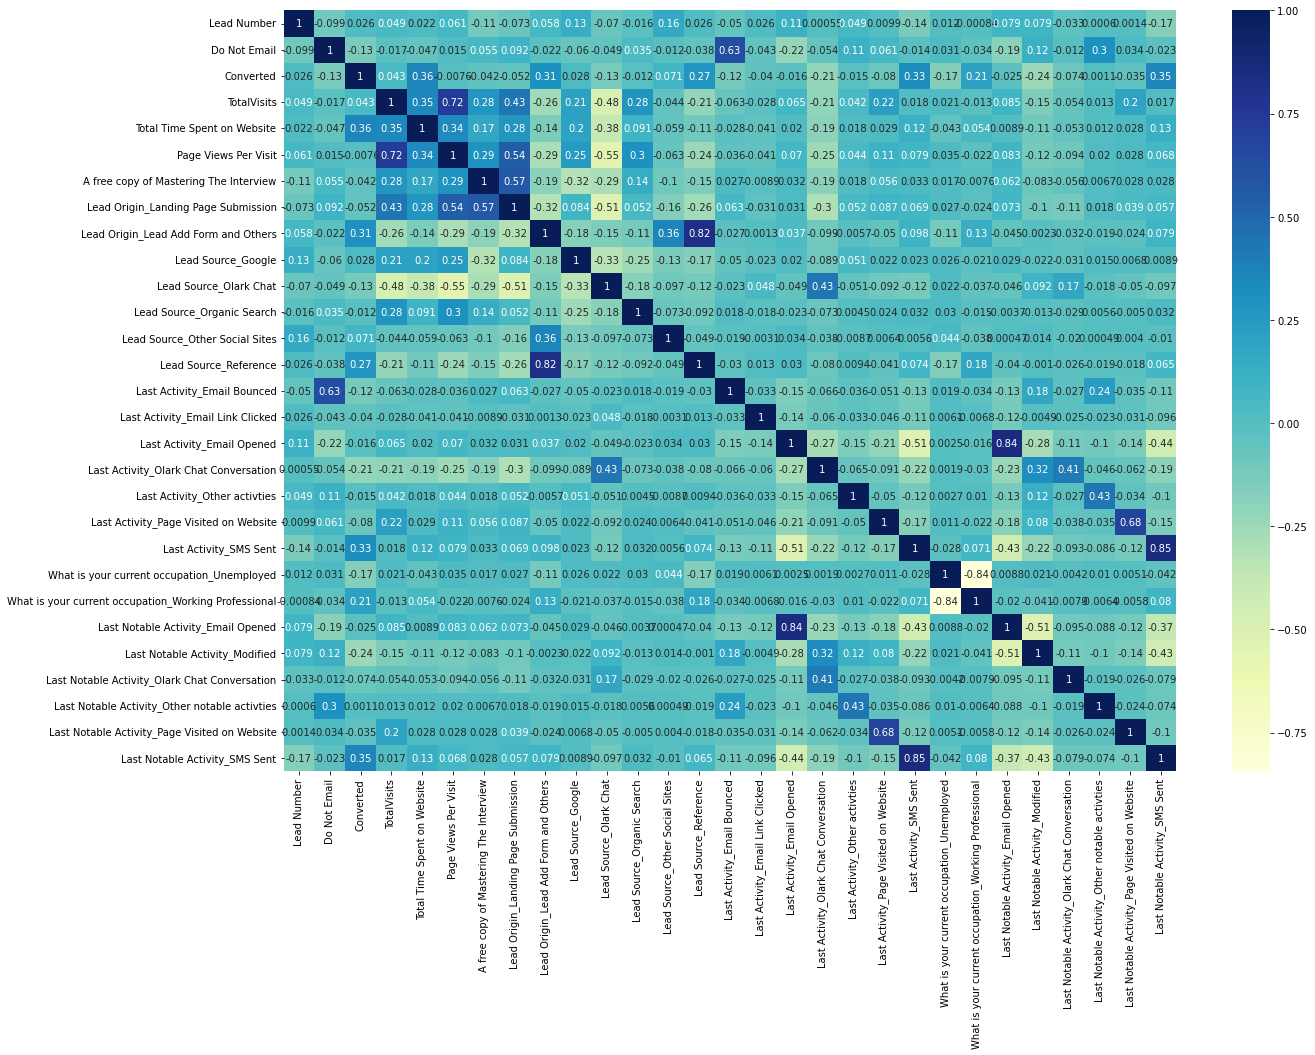

In [74]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,14))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

**Observations**:
<br>Dropping highly correlated dummy variable

In [75]:
X_test.drop(['Lead Origin_Lead Add Form and Others', 'Last Notable Activity_SMS Sent', 
                     'What is your current occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['Lead Origin_Lead Add Form and Others', 'Last Notable Activity_SMS Sent', 
                     'What is your current occupation_Working Professional'], axis = 1, inplace = True)

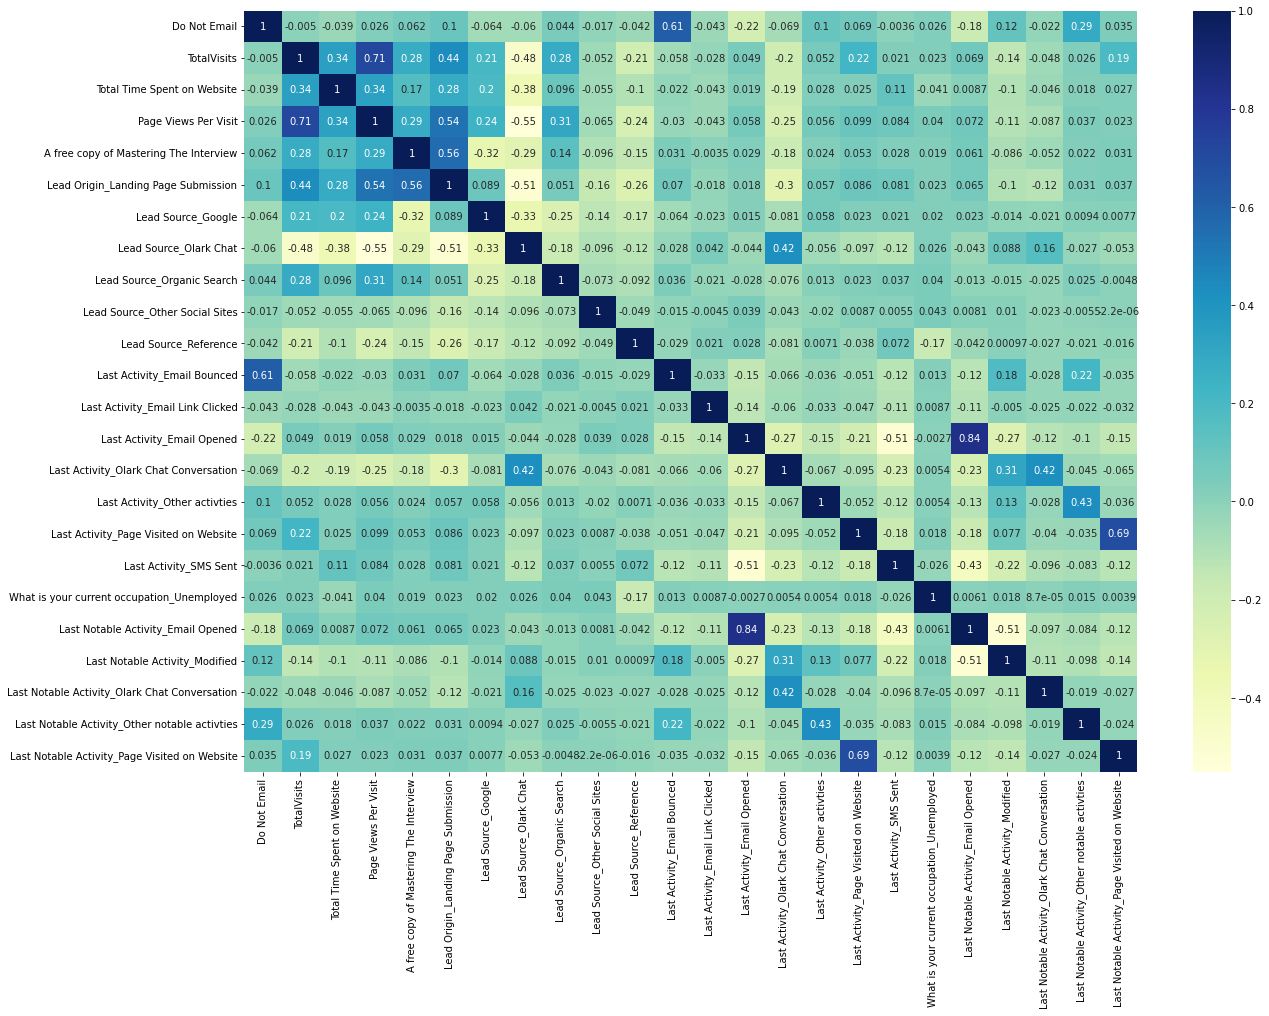

In [76]:
## lets check the correlation matrix again
plt.figure(figsize = (20,14))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Model Building

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [78]:
# Import RFE
from sklearn.feature_selection import RFE

In [79]:
# Running RFE with 15 variables as output
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [80]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other Social Sites', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Other activties', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Ac

In [81]:
# assign columns
col = X_train.columns[rfe.support_]

In [82]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [83]:
# Importing statsmodels
import statsmodels.api as sm

### Model 1: Assessing the model with statsmodel

In [84]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.5
Date:                Tue, 27 Dec 2022   Deviance:                       5671.0
Time:                        13:43:15   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0250      0.175     -5.857      0.000      -1.368      -0.682
Do Not Email                                     -1.1944      0.162     -7.388      0.000      -1.511      -0.878
TotalVisits                                       1.2046      0.282      4.267      0.000       0.651       1.758
Total Time Spent on Website                       4.3844      0.162     27.100      0.000       4.067       4.701
Page Views Per Visit                             -1.4414      0.254     -5.674      0.000      -1.939      -0.944
Lead Source_Olark Chat                            0.7382      0.118      6.254      0.000       0.507       0.970
Lead Source_Other Social Sites                    1.7830      0.161     11.089      0.000       1.468       2.098
Lead Source_Reference                             3.5201      0.210     16.782      0.000       3.109       3.931
Last Activity_Email Opened                        1.1474      0.149      7.685      0.000       0.855       1.440
Last Activity_Other activties                     1.2232      0.197      6.222      0.000       0.838       1.608
Last Activity_SMS Sent                            1.6261      0.128     12.699      0.000       1.375       1.877
What is your current occupation_Unemployed       -1.0045      0.095    -10.619      0.000      -1.190      -0.819
Last Notable Activity_Email Opened               -1.0706      0.171     -6.245      0.000      -1.407      -0.735
Last Notable Activity_Modified                   -1.3600      0.114    -11.920      0.000      -1.584      -1.136
Last Notable Activity_Olark Chat Conversation    -1.5587      0.329     -4.733      0.000      -2.204      -0.913
Last Notable Activity_Page Visited on Website    -0.4727      0.232     -2.038      0.042      -0.927      -0.018
=================================================================================================================
"""

In [85]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,7.23
7,Last Activity_Email Opened,6.94
3,Page Views Per Visit,5.97
10,What is your current occupation_Unemployed,5.44
1,TotalVisits,4.97
12,Last Notable Activity_Modified,2.88
9,Last Activity_SMS Sent,2.63
2,Total Time Spent on Website,2.15
4,Lead Source_Olark Chat,1.90
14,Last Notable Activity_Page Visited on Website,1.32


**Observations**
<br>All features has pvalue below 0.05 and few features has higher VIF(>5) so first dropping a feature having higher VIF and see if it improves rest feature and model.

In [87]:
# drop "Last Notable Activity_Email Opened"
X_train.drop(['Last Notable Activity_Email Opened'], axis = 1, inplace = True)

### Model 2: Assessing the model with remaining feature.

In [88]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.7
Date:                Tue, 27 Dec 2022   Deviance:                       5709.4
Time:                        13:43:15   Pearson chi2:                 6.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4283      0.163     -8.750      0.000      -1.748      -1.108
Do Not Email                                     -1.1460      0.160     -7.146      0.000      -1.460      -0.832
TotalVisits                                       1.1891      0.282      4.224      0.000       0.637       1.741
Total Time Spent on Website                       4.3982      0.161     27.280      0.000       4.082       4.714
Page Views Per Visit                             -1.4003      0.253     -5.540      0.000      -1.896      -0.905
Lead Source_Olark Chat                            0.7698      0.118      6.542      0.000       0.539       1.000
Lead Source_Other Social Sites                    1.8192      0.161     11.334      0.000       1.505       2.134
Lead Source_Reference                             3.6098      0.210     17.189      0.000       3.198       4.021
Last Activity_Email Opened                        0.5608      0.120      4.672      0.000       0.326       0.796
Last Activity_Other activties                     1.2890      0.195      6.615      0.000       0.907       1.671
Last Activity_SMS Sent                            1.9043      0.120     15.809      0.000       1.668       2.140
What is your current occupation_Unemployed       -1.0000      0.094    -10.598      0.000      -1.185      -0.815
Last Notable Activity_Modified                   -0.9089      0.088    -10.360      0.000      -1.081      -0.737
Last Notable Activity_Olark Chat Conversation    -1.1861      0.324     -3.658      0.000      -1.822      -0.551
Last Notable Activity_Page Visited on Website    -0.0913      0.224     -0.407      0.684      -0.531       0.349
=================================================================================================================
"""

In [89]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.92
10,What is your current occupation_Unemployed,5.07
1,TotalVisits,4.95
7,Last Activity_Email Opened,2.97
9,Last Activity_SMS Sent,2.51
2,Total Time Spent on Website,2.15
11,Last Notable Activity_Modified,1.99
4,Lead Source_Olark Chat,1.85
13,Last Notable Activity_Page Visited on Website,1.29
6,Lead Source_Reference,1.26


**Observations**
<br> All features has pvalue below 0.05 and one feature have VIF above 5 so dropping it.

In [90]:
# drop "Last Notable Activity_Page Visited on Website"
X_train.drop(['Page Views Per Visit'], axis = 1, inplace = True)

### Model 3: Assessing the model with remaining feature.

In [91]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2870.3
Date:                Tue, 27 Dec 2022   Deviance:                       5740.7
Time:                        13:43:15   Pearson chi2:                 6.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6536      0.158    -10.438      0.000      -1.964      -1.343
Do Not Email                                     -1.1560      0.160     -7.211      0.000      -1.470      -0.842
TotalVisits                                       0.3478      0.237      1.467      0.142      -0.117       0.813
Total Time Spent on Website                       4.3764      0.161     27.206      0.000       4.061       4.692
Lead Source_Olark Chat                            1.0154      0.110      9.253      0.000       0.800       1.231
Lead Source_Other Social Sites                    1.9562      0.158     12.356      0.000       1.646       2.267
Lead Source_Reference                             3.8397      0.206     18.597      0.000       3.435       4.244
Last Activity_Email Opened                        0.5305      0.120      4.429      0.000       0.296       0.765
Last Activity_Other activties                     1.2482      0.195      6.407      0.000       0.866       1.630
Last Activity_SMS Sent                            1.8500      0.120     15.453      0.000       1.615       2.085
What is your current occupation_Unemployed       -1.0002      0.094    -10.614      0.000      -1.185      -0.816
Last Notable Activity_Modified                   -0.9076      0.088    -10.372      0.000      -1.079      -0.736
Last Notable Activity_Olark Chat Conversation    -1.1587      0.323     -3.590      0.000      -1.791      -0.526
Last Notable Activity_Page Visited on Website     0.0493      0.221      0.223      0.823      -0.384       0.483
=================================================================================================================
"""

In [92]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,4.92
1,TotalVisits,3.09
6,Last Activity_Email Opened,2.80
8,Last Activity_SMS Sent,2.36
2,Total Time Spent on Website,2.14
10,Last Notable Activity_Modified,1.94
3,Lead Source_Olark Chat,1.69
12,Last Notable Activity_Page Visited on Website,1.28
5,Lead Source_Reference,1.21
11,Last Notable Activity_Olark Chat Conversation,1.16


**Observations**
<br> Again, all features have VIF under 5 and only one feature has high pvalue so dropping it.

In [93]:
# drop "Page Views Per Visit"
X_train.drop(['TotalVisits'], axis = 1, inplace = True)

### Model 4: Assessing the model with remaining feature.

In [94]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.4
Date:                Tue, 27 Dec 2022   Deviance:                       5742.8
Time:                        13:43:15   Pearson chi2:                 6.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5800      0.150    -10.532      0.000      -1.874      -1.286
Do Not Email                                     -1.1645      0.160     -7.271      0.000      -1.478      -0.851
Total Time Spent on Website                       4.4001      0.160     27.483      0.000       4.086       4.714
Lead Source_Olark Chat                            0.9439      0.098      9.644      0.000       0.752       1.136
Lead Source_Other Social Sites                    1.9189      0.156     12.290      0.000       1.613       2.225
Lead Source_Reference                             3.7699      0.201     18.784      0.000       3.377       4.163
Last Activity_Email Opened                        0.5374      0.120      4.491      0.000       0.303       0.772
Last Activity_Other activties                     1.2636      0.194      6.500      0.000       0.883       1.645
Last Activity_SMS Sent                            1.8537      0.120     15.486      0.000       1.619       2.088
What is your current occupation_Unemployed       -0.9991      0.094    -10.611      0.000      -1.184      -0.815
Last Notable Activity_Modified                   -0.9121      0.087    -10.429      0.000      -1.083      -0.741
Last Notable Activity_Olark Chat Conversation    -1.1403      0.322     -3.541      0.000      -1.771      -0.509
Last Notable Activity_Page Visited on Website     0.1097      0.217      0.506      0.613      -0.315       0.535
=================================================================================================================
"""

In [95]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,Do Not Email,1.14
1,Total Time Spent on Website,2.03
2,Lead Source_Olark Chat,1.46
3,Lead Source_Other Social Sites,1.07
4,Lead Source_Reference,1.14
5,Last Activity_Email Opened,2.50
6,Last Activity_Other activties,1.12
7,Last Activity_SMS Sent,2.19
8,What is your current occupation_Unemployed,4.67
9,Last Notable Activity_Modified,1.88


**Observations**
<br> Now, all features have VIF below 5 and all features has  pvalue below 0.05 So we need not drop any more variables and we can proceed with making predictions using this model only.

## Making  Prediction

In [96]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302    0.59
6087   0.02
1033   0.24
7656   0.23
3241   0.76
5738   0.12
7366   0.18
3680   0.04
4170   0.75
43     0.17
dtype: float64

In [97]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.58938547, 0.02385219, 0.24389495, 0.23002709, 0.76116029,
       0.1215566 , 0.17535918, 0.03813477, 0.745326  , 0.1663473 ])

In [98]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.59
1,0,0.02
2,0,0.24
3,0,0.23
4,1,0.76


In [99]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,0,0.59,1
1,0,0.02,0
2,0,0.24,0
3,0,0.23,0
4,1,0.76,1


# Model Evaluation

In [100]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3434,  501],
       [ 790, 1638]], dtype=int64)

In [102]:
# Predicted        No         Yes
# Actual
# No              3426      509
# Yes             800      1628

In [103]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7971082822567971

**Observations**
<br> Accuracy is around 80% which is very good.

In [104]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [105]:
# sensitivity
TP/(TP+FN)

0.6746293245469522

In [106]:
# Specificity
TN/(TN+FP)

0.8726810673443456

## Optimise Cut off (ROC Curve)

In [107]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

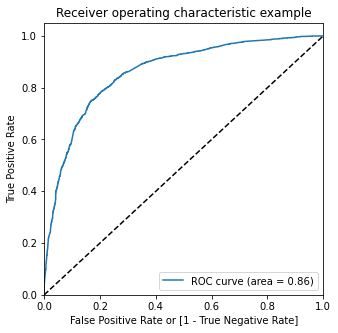

In [109]:
# ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

**Observations**
<br> The area under ROC curve is 0.86 which is a very good value.

In [110]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.59,1,1,1,1,1,1,1,0,0,0,0
1,0,0.02,0,1,0,0,0,0,0,0,0,0,0
2,0,0.24,0,1,1,1,0,0,0,0,0,0,0
3,0,0.23,0,1,1,1,0,0,0,0,0,0,0
4,1,0.76,1,1,1,1,1,1,1,1,1,0,0


In [111]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.00,0.00,0.38,1.00,0.00
0.10,0.10,0.57,0.97,0.32
0.20,0.20,0.71,0.91,0.59
0.30,0.30,0.77,0.84,0.74
0.40,0.40,0.79,0.77,0.81
0.50,0.50,0.80,0.67,0.87
0.60,0.60,0.78,0.54,0.92
0.70,0.70,0.76,0.46,0.95
0.80,0.80,0.72,0.33,0.97
0.90,0.90,0.68,0.17,0.99


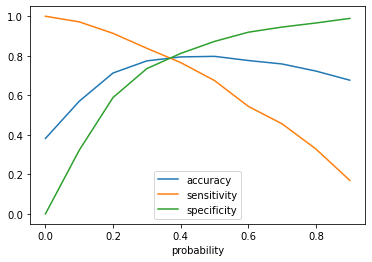

In [112]:
# Plot
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Observations**
<br> From the graph it is visible that the optimal cut off is at 0.38.

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.59,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.02,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.24,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.23,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.76,1,1,1,1,1,1,1,1,1,0,0,1


In [114]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Conversion_Probability.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.59,1,1,1,1,1,1,1,0,0,0,0,1,59
1,0,0.02,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.24,0,1,1,1,0,0,0,0,0,0,0,0,24
3,0,0.23,0,1,1,1,0,0,0,0,0,0,0,0,23
4,1,0.76,1,1,1,1,1,1,1,1,1,0,0,1,76
5,0,0.12,0,1,1,0,0,0,0,0,0,0,0,0,12
6,0,0.18,0,1,1,0,0,0,0,0,0,0,0,0,18
7,0,0.04,0,1,0,0,0,0,0,0,0,0,0,0,4
8,1,0.75,1,1,1,1,1,1,1,1,1,0,0,1,75
9,0,0.17,0,1,1,0,0,0,0,0,0,0,0,0,17


In [115]:
# Checking the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7912934150557913

In [116]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3137,  798],
       [ 530, 1898]], dtype=int64)

In [117]:
# Predicted        No         Yes
# Actual
# No              3135      800
# Yes             535      1893

In [118]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [119]:
# Sensitivity
TP/(TP+FN)

0.7817133443163097

In [120]:
# Specificity
TN/(TN+FP)

0.7972045743329098

**Observations**
<br> With the current cut off as 0.38 we have sensitivity of 78% and specificity of around 80%.

## Precision-Recall

In [121]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3434,  501],
       [ 790, 1638]], dtype=int64)

In [122]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7657784011220197

In [123]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6746293245469522

**Observations**
<br> With the current cut off as 0.38 we have Precision around 77% and Recall around 67%.

# Prediction on Test set

In [124]:
#Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [125]:
col = X_train.columns

In [126]:
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Other Social Sites,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Other activties,Last Activity_SMS Sent,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
6906,1.00,0,0.67,0,0,0,0,0,1,1,0,0,0
1873,1.00,0,0.08,0,0,0,0,0,1,1,1,0,0
771,1.00,0,0.02,0,0,0,1,0,0,1,0,0,0
4495,1.00,0,0.06,0,0,0,1,0,0,1,0,0,0
9061,1.00,0,0.79,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1.00,0,0.23,0,0,0,1,0,0,1,0,0,0
1540,1.00,0,0.41,0,0,0,1,0,0,1,1,0,0
5198,1.00,0,0.19,0,0,0,1,0,0,1,0,0,0
8660,1.00,0,0.00,1,0,0,0,0,0,1,1,0,0


In [127]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.90
1,0,0.22
2,0,0.12
3,0,0.15
4,1,0.82


In [128]:
# Making prediction using cut off 0.38
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,1,0.90,1
1,0,0.22,0
2,0,0.12,0
3,0,0.15,0
4,1,0.82,1
...,...,...,...
2722,0,0.27,0
2723,1,0.24,0
2724,1,0.23,0
2725,0,0.07,0


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7766776677667767

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1296,  364],
       [ 245,  822]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Sensitivity
TP/(TP+FN)

0.7703842549203374

In [133]:
# Specificity
TN/(TN+FP)

0.7807228915662651

**Observations**
<br> With the current cut off as 0.38 we have Sensitivity and Specificity around 78%.

## Precision-Recall

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3434,  501],
       [ 790, 1638]], dtype=int64)

In [135]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7657784011220197

In [136]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6746293245469522

**Observations**
<br> With the current cut off as 0.38 we have Precision around 77% and Recall around 67%.

### Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    0
 6360    0
 6361    1
 6362    0
 Name: Predicted, Length: 6363, dtype: int64)

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

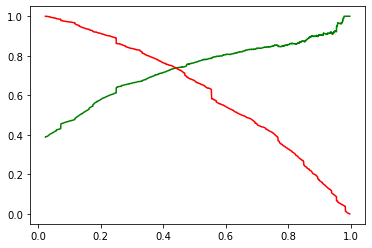

In [140]:
#plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.59,1,1,1,1,1,1,1,0,0,0,0,1,59
1,0,0.02,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.24,0,1,1,1,0,0,0,0,0,0,0,0,24
3,0,0.23,0,1,1,1,0,0,0,0,0,0,0,0,23
4,1,0.76,1,1,1,1,1,1,1,1,1,0,0,1,76


In [142]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7993085022787993

In [143]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3313,  622],
       [ 655, 1773]], dtype=int64)

In [144]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [145]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7402922755741127

In [146]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7302306425041186

**Observations**
<br> With the current cut off as 0.45 we have Precision and Recall of around 73%.

## Prediction on Test set

In [147]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.90
1,0,0.22
2,0,0.12
3,0,0.15
4,1,0.82


In [148]:
# Making prediction using cut off 0.45
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,1,0.90,1
1,0,0.22,0
2,0,0.12,0
3,0,0.15,0
4,1,0.82,1
...,...,...,...
2722,0,0.27,0
2723,1,0.24,0
2724,1,0.23,0
2725,0,0.07,0


In [149]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Conversion_Probability.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,Conversion_Probability,final_predicted,lead_score
0,1,0.90,1,90
1,0,0.22,0,22
2,0,0.12,0,12
3,0,0.15,0,15
4,1,0.82,1,82
5,1,0.21,0,21
6,0,0.10,0,10
7,0,0.03,0,3
8,0,0.12,0,12
9,1,0.92,1,92


### Check the overall accuracy

In [150]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7869453612027869

In [151]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1384,  276],
       [ 305,  762]], dtype=int64)

In [152]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [153]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7341040462427746

In [154]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7141518275538894

**Observations**
<br> With the current cut off as 0.45 we have Precision around 74% , Recall around 72% and accuracy of around 79%.

# Conclusion

With Precsion, Recall and Accuracy of 72+ on test dataset ,The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.

<br>**Features that mattered the most for potential buyers are**<br>

<br> What is your current occupation_Unemployed,Last Activity_Email Opened,Last Activity_SMS Sent,Total Time Spent on Website,Last Notable Activity_Modified,Lead Source_Olark Chat,Last Notable Activity_Other notable activties,Last Activity_Other activties,Do Not Email,Lead Source_Reference,Last Notable Activity_Olark Chat Conversation,Lead Source_Other Social Sites.

<br>**We can suggest few things to CEO as mentioned below**<br>

<br>1.A group can be made of "Hot leads" or " High priority" having conversion rate of 75% or more and sales team can focus on this section to as this will be converted easily.
<br>2.A group can be made as "Intermediate priority having conversion rate between 40%-74% and sales team can provide them offers as with ample amount of work these leads have chance of getting converted.
<br>3.Third group can be made as "Low priority" having conversion rate of less than 40% and sales team can avoid these leads as they have less chances of getting converted and investing time and resource may result in loss of revenue.